## Introduction

The dataset is about U.S.A. population in the year 2010. We will do analysis of this data to learn a bit more about population distributiom of U.S.A in the year 2010. 

In [5]:
# lets first do the imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from __future__ import division 

In [6]:
df = pd.read_csv("us-age-gender-breakdown.csv")

In [7]:
# Lets have a look at the data
df.head()

,Age_Range,Total_Pop_2010,Males_2010,Females_2010
0,<5,20201362,10319427,9881935
1,5-9,20348657,10389638,9959019
2,10-14,20677194,10579862,10097332
3,15-19,22040343,11303666,10736677
4,20-24,21585999,11014176,10571823


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 4 columns):
Age_Range         21 non-null object
Total_Pop_2010    21 non-null int64
Males_2010        21 non-null int64
Females_2010      21 non-null int64
dtypes: int64(3), object(1)
memory usage: 744.0+ bytes


So, they are 21 Age bins and the corresponding total, male and female population. Lets explore various aspects of this data.

## Exploratory Data Analysis

Let us first see the total population distribution in 2010 and overall sex ratio.

In [9]:
#lets see number of males and females
males = df["Males_2010"].sum()
females = df["Females_2010"].sum()
ratio = males/females
print males,females,ratio

151781326 156964212 0.966980460489


Seems like there are more females than males. Lets see the ratio in different Age groups

In [11]:
# Adding a new column in the database
df["ratio"] = df["Males_2010"]/df["Females_2010"]

In [12]:
#Lets have a look again
df.head()

,Age_Range,Total_Pop_2010,Males_2010,Females_2010,ratio
0,<5,20201362,10319427,9881935,1.044272
1,5-9,20348657,10389638,9959019,1.043239
2,10-14,20677194,10579862,10097332,1.047788
3,15-19,22040343,11303666,10736677,1.052809
4,20-24,21585999,11014176,10571823,1.041843


It appears that most of the age gropus have sex-ratio greater than one. Lets see the groups with maximum and minimum sex ratio.

In [13]:
#Lets first see the group with maximum ratio of males over females
df.loc[df["ratio"].idxmax()]

Age_Range            15-19
Total_Pop_2010    22040343
Males_2010        11303666
Females_2010      10736677
ratio              1.05281
Name: 3, dtype: object

In [14]:
#Now lets first see the group with minimum ratio of males over females
df.loc[df["ratio"].idxmin()]

Age_Range             100+
Total_Pop_2010       53364
Males_2010            9162
Females_2010         44202
ratio             0.207276
Name: 20, dtype: object

In [15]:
#Now lets see the group with max population
df.loc[df["Total_Pop_2010"].idxmax()]

Age_Range            45-49
Total_Pop_2010    22708591
Males_2010        11209085
Females_2010      11499506
ratio             0.974745
Name: 9, dtype: object

Now, lets go a little deeper. For a country it's young population is very much important. While the definition of young varies person to person, we will define it from 20-34. Lets see how much proportion they constiute of the total population in 2010.

In [18]:
# Age_Range of young population
df["Age_Range"][4:7]

4    20-24
5    25-29
6    30-34
Name: Age_Range, dtype: object

In [48]:
df["Total_Pop_2010"][4:7].sum()/df["Total_Pop_2010"].sum()

0.20291774062820625

So, approximately 20% of U.S. population was young in 2010. Certainly not a good figure. Nevertheless, lets determine the working population for U.S.A. We are taking it as people in the age group 20-59.

In [21]:
#Working population
df["Age_Range"][4:12]

4     20-24
5     25-29
6     30-34
7     35-39
8     40-44
9     45-49
10    50-54
11    55-59
Name: Age_Range, dtype: object

In [53]:
df["Total_Pop_2010"][4:12].sum()/df["Total_Pop_2010"].sum()

0.5454073120888309

Around 55% of U.S.A. population in 2010 was capable of contributing towards the economy. Great!Now, we have played with the figures. Lets do some plotting.

### Figure 1 : Male- Female poulation distribution with age-groups

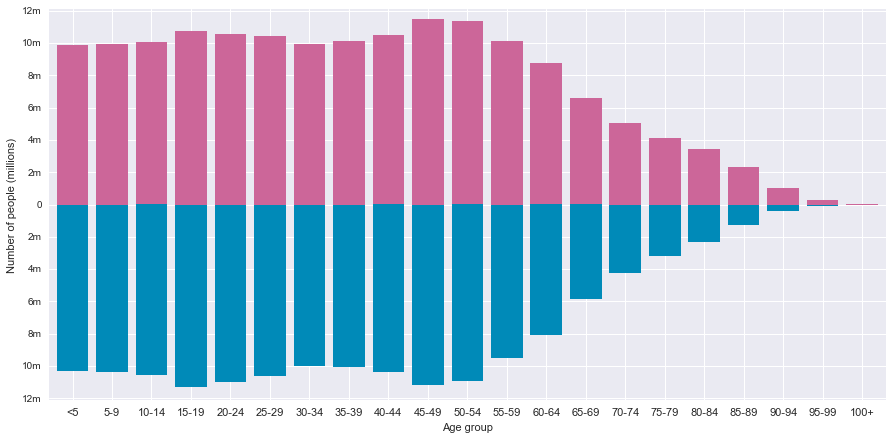

In [22]:
fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(111)

for (i, row) in df.iterrows():
    plt.bar([i, i], [row['Females_2010'], -row['Males_2010']],
            color=['#CC6699', '#008AB8'], width=0.8, align='center', edgecolor='none')
plt.xlim(-0.6, 20.6)
plt.ylim(-12.1e6, 12.1e6)
#plt.grid(False, axis='x')
plt.xticks(np.arange(0, 21), df['Age_Range'], fontsize=11)
plt.yticks(np.arange(-12e6, 13e6, 2e6),
           ['{}m'.format(int(abs(x) / 1e6)) if x != 0 else 0 for x in np.arange(-12e6, 13e6, 2e6)])
plt.xlabel('Age group')
plt.ylabel('Number of people (millions)')    

### Figure 2 : Male-Female Popluation distrbution 

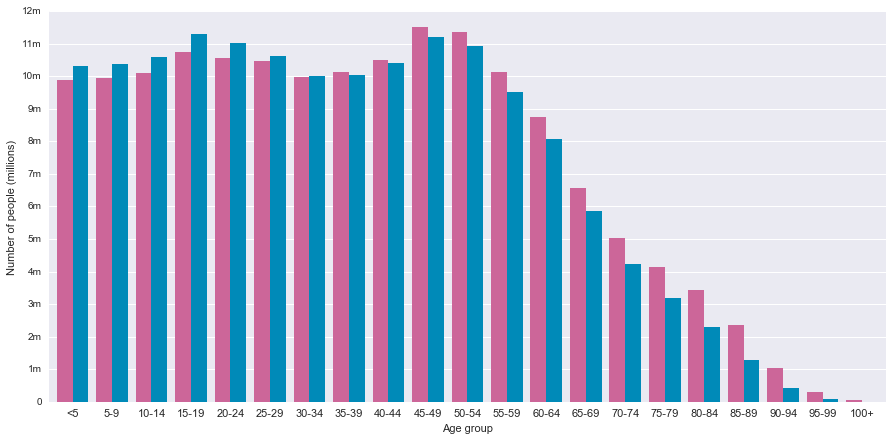

In [58]:
fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(111)

for (i, row) in df.iterrows():
    plt.bar([i - 0.2, i + 0.2], [row['Females_2010'], row['Males_2010']],
            color=['#CC6699', '#008AB8'], width=0.4, align='center', edgecolor='none')
    
plt.xlim(-0.6, 20.6)
plt.xticks(range(0, 21), df['Age_Range'], fontsize=11)
plt.grid(False, axis='x')
plt.yticks(np.arange(0, 13e6, 1e6),
           ['{}m'.format(int(x / 1e6)) if x > 0 else 0 for x in np.arange(0, 13e6, 1e6)])
plt.xlabel('Age group')
plt.ylabel('Number of people (millions)')


## Reflection

The dataset gives the information about population of U.S.A. in the year2010. The population is distributed in theage groups.
Analysis of the total population revealed that overall, there are more females than males. Aslo, 20% of U.S. population is young(Age between 20-34) while 55% of population is in working age group(20-59). Thats really a great sign for economy.
While, males were slightly higher than females in count, in younger age groups, the sex ratio was inclined in the favour of females in the older age group and overall too. Two figures, have been put that nicely support the stats.